In [1]:
import pandas as pd 


df = pd.read_csv('dirty_orders.csv')

In [2]:
df.head()

,order_id,customer_id,email,phone,country,status,total_amount,discount_amount,refund_amount,order_date,ship_date
0,1001.0,103.0,user103@example.com,010-7047-4839,Japan,cancelled,237740.0,68457.0,204270.0,2025-01-09,2025-01-10
1,1002.0,180.0,user180@example.com,010-2258-8609,USA,cancelled,373418.0,53577.0,364836.0,2024-12-02,2024-12-03
2,1003.0,93.0,user93@example.com,010-9706-5804,Japan,delivered,436557.0,117322.0,0.0,2025-01-24,2025-01-28
3,1004.0,NaN,user15@example.com,010-1067-6660,USA,delivered,219659.0,21233.0,0.0,2024-12-08,2024-12-11
4,1005.0,107.0,user107@example.com,010-5478-9210,South Korea,cancelled,26613.0,1000.0,13334.0,2025-01-17,2025-01-18


In [3]:
df.describe()

,order_id,customer_id,total_amount,discount_amount,refund_amount
count,497.000000,492.000000,5.000000e+02,500.00000,500.000000
mean,1250.014085,102.286585,6.211439e+05,37685.64200,46057.188000
std,144.494997,57.002458,5.963737e+06,38469.26516,107253.524267
min,1001.000000,1.000000,-5.000000e+04,23.00000,0.000000
25%,1125.000000,52.750000,1.255880e+05,10160.50000,0.000000
50%,1249.000000,104.000000,2.429790e+05,27925.00000,0.000000
75%,1375.000000,150.250000,3.554165e+05,54989.25000,0.000000
max,1500.000000,200.000000,1.000000e+08,500000.00000,800000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         497 non-null    float64
 1   customer_id      492 non-null    float64
 2   email            500 non-null    object 
 3   phone            500 non-null    object 
 4   country          500 non-null    object 
 5   status           500 non-null    object 
 6   total_amount     500 non-null    float64
 7   discount_amount  500 non-null    float64
 8   refund_amount    500 non-null    float64
 9   order_date       500 non-null    object 
 10  ship_date        500 non-null    object 
dtypes: float64(5), object(6)
memory usage: 43.1+ KB


In [5]:
order_id_val = df['order_id'].value_counts()
order_filter = order_id_val[order_id_val > 2]
print(order_filter.sum())

# 간결하게 nan 제외 unqiue 보는법
total_nan_order_id = df['order_id'].count()
print(f'count는 nan을 제외하고 수를 센다: {total_nan_order_id}')
# nunique은 nan을 제외한 유니크 수임. 
except_nan_order_id =df['order_id'].nunique()
print(f'nan을 포함하지 않은 중복값이 없는 수: {except_nan_order_id}')

# ===> order_id : 중복값은 5개 nan값 3개


0
count는 nan을 제외하고 수를 센다: 497
nan을 포함하지 않은 중복값이 없는 수: 492


<Axes: >

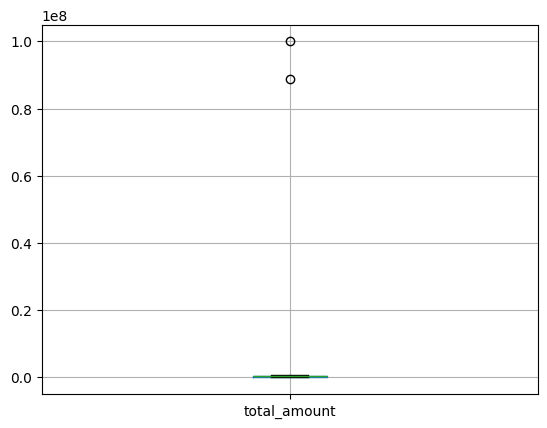

In [12]:
# 도메인 타당성을 위한 체크 -> 음수 차단할거. max값은 한없이 높음. 따라서 분포확인
df[['total_amount']].boxplot()